In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R04_50")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [5]:
dataset.shape


(986000, 65)

In [6]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns={"label"})
Y = dataset['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [7]:
train_accuracies = []

In [8]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [10]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 788800 samples
788800/788800 [==============================] - 83s 105us/sample - loss: 0.9458 - acc: 0.5480
epoch 2/100
Train on 788800 samples
788800/788800 [==============================] - 81s 103us/sample - loss: 0.8341 - acc: 0.6124
epoch 3/100
Train on 788800 samples
788800/788800 [==============================] - 82s 103us/sample - loss: 0.7794 - acc: 0.6417
epoch 4/100
Train on 788800 samples
788800/788800 [==============================] - 82s 103us/sample - loss: 0.7476 - acc: 0.6574
epoch 5/100
Train on 788800 samples
788800/788800 [==============================] - 81s 103us/sample - loss: 0.7257 - acc: 0.6684
epoch 6/100
Train on 788800 samples
788800/788800 [==============================] - 82s 103us/sample - loss: 0.7098 - acc: 0.6768
epoch 7/100
Train on 788800 samples
788800/788800 [==============================] - 82s 103us/sample - loss: 0.6977 - acc: 0.6829
epoch 8/100
Train on 788800 samples
788800/788800 [==============================] 

In [14]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7505
Test Accuracy: 0.6648


In [15]:
print(train_accuracies)

[0.547964, 0.61244804, 0.64167345, 0.6573618, 0.6684204, 0.6767508, 0.6828626, 0.68684965, 0.6913438, 0.69436485, 0.6973111, 0.69951195, 0.70211333, 0.70405424, 0.70562756, 0.70726675, 0.7084597, 0.70966405, 0.71049696, 0.7118458, 0.7124518, 0.713769, 0.7141696, 0.7149962, 0.71573275, 0.71602815, 0.71661764, 0.71718055, 0.7173808, 0.7177992, 0.71865493, 0.718144, 0.7185801, 0.7186904, 0.71889704, 0.719645, 0.7190999, 0.71966404, 0.71941936, 0.7201319, 0.7199569, 0.7199556, 0.719555, 0.7202814, 0.72015846, 0.7198669, 0.72022563, 0.7201128, 0.72008497, 0.7204095, 0.72016734, 0.72007734, 0.7203245, 0.71989095, 0.71996194, 0.7202662, 0.719588, 0.7203803, 0.7194802, 0.7190923, 0.71917975, 0.7194232, 0.71922666, 0.7188058, 0.71851546, 0.71926725, 0.7176597, 0.7179577, 0.71786386, 0.7175862, 0.716804, 0.7177282, 0.71661, 0.71673304, 0.71643764, 0.71643126, 0.71577203, 0.7149556, 0.7160357, 0.71521676, 0.7150887, 0.7133773, 0.71348, 0.71387553, 0.713518, 0.7128588, 0.711449, 0.7112576, 0.71076

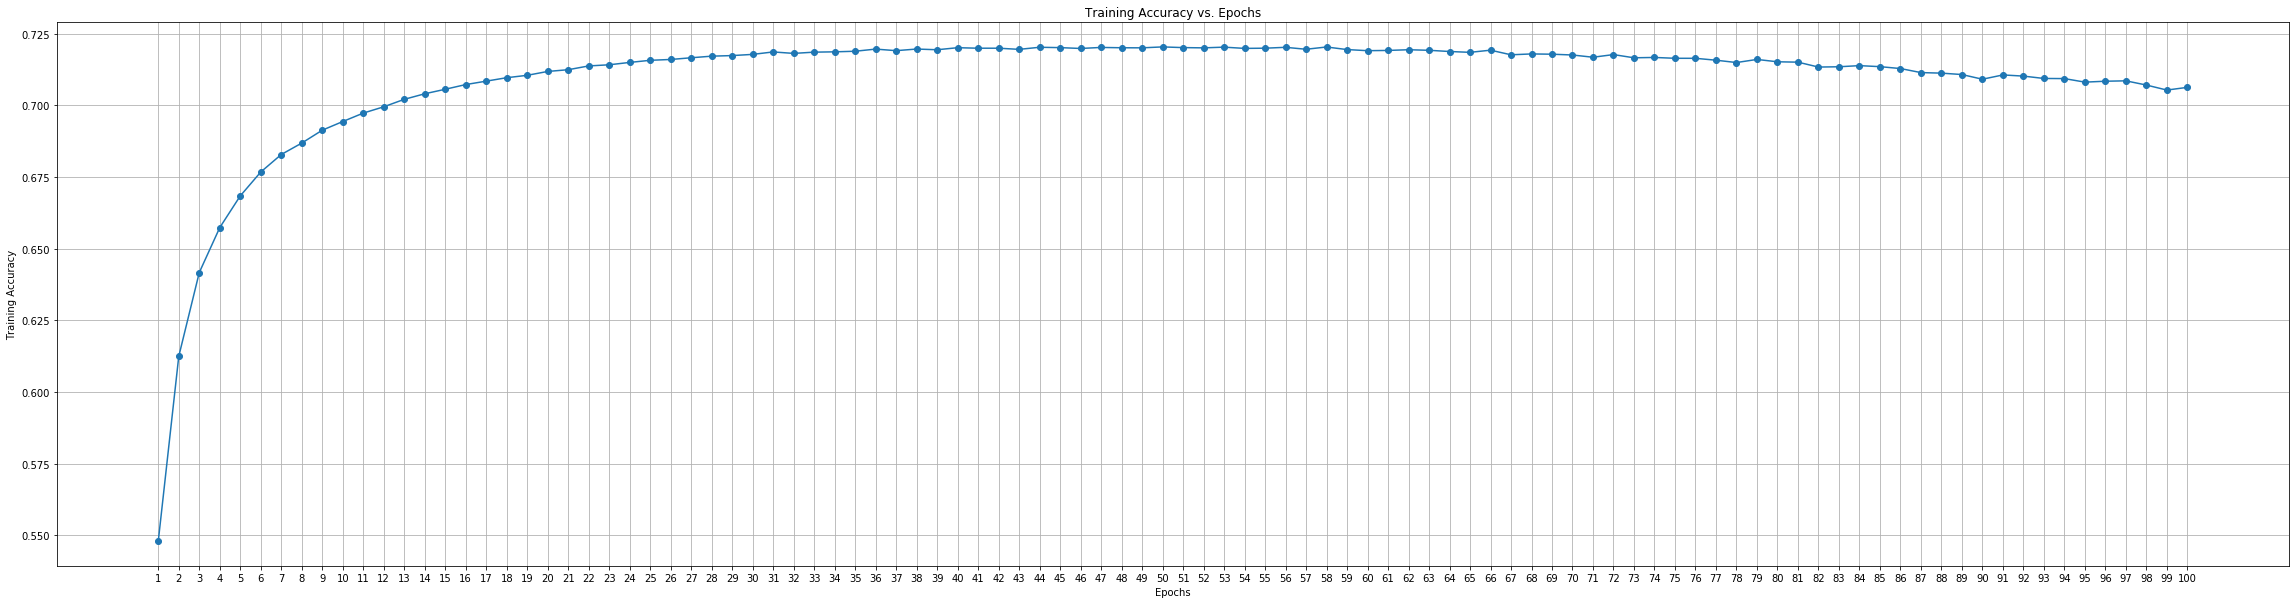

In [16]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()